# Image Hand Gesture Preprocessing

In [1]:
import cv2
import numpy as np
img = cv2.imread("/home/zadmin/Desktop/capture5.jpeg")
blurred = cv2.GaussianBlur(img, (5, 5), 0) # Remove noise
edge=cv2.Canny(blurred,50,100)
contours, hierarchy = cv2.findContours(edge,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, (0, 255, 0),2)
cv2.imshow('contour',img)
cv2.imshow('canny',edge)
def edgedetect (channel):
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)
    sobel = np.hypot(sobelX, sobelY)
    sobel[sobel > 255] = 255; # Some values seem to go above 255. However RGB channels has to be within 0-255
    return sobel

edgeImg = np.max( np.array([ edgedetect(blurred[:,:, 0]), edgedetect(blurred[:,:, 1]), edgedetect(blurred[:,:, 2]) ]), axis=0 )
mean = np.mean(edgeImg);
# Zero any value that is less than mean. This reduces a lot of noise.
edgeImg[edgeImg <= mean] = 0;
cv2.namedWindow("sobel", cv2.WINDOW_NORMAL)
cv2.imshow('sobel',edgeImg)'''


'''cv2.namedWindow("input", cv2.WINDOW_NORMAL)
cv2.namedWindow("img", cv2.WINDOW_NORMAL)
im = cv2.imread("/home/zadmin/Desktop/capture5.jpeg")
cv2.imshow('input',im)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(im_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
blurred = cv2.GaussianBlur(thresh, (5, 5), 0) # Remove noise
cv2.imshow('img',blurred)'''
if(cv2.waitKey(0)==ord('q')):
    cv2.destroyAllWindows()



In [9]:
def edgedetect (channel):
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)
    sobel = np.hypot(sobelX, sobelY)
    sobel[sobel > 255] = 255; # Some values seem to go above 255. However RGB channels has to be within 0-255
    return sobel

# Video Hand Gesture Preprocessing

In [1]:
import cv2 #image processing library-opencv
import numpy as np

cam = cv2.VideoCapture(0)
# Add the location for static image
while True:
    ret, frame = cam.read()#frame-by-frame capturing
    frame = cv2.flip(frame,1)#frame flipping
    boxFrame=cv2.rectangle(frame, (325,50),(600,400), (0,255,0), thickness=2)#creates a box area for hand gesture
    croppedBox=boxFrame[48:402, 323:602] #image cropping using array slicing
    blurred = cv2.GaussianBlur(croppedBox, (5, 5), 0) # Remove noise
    cannyEdge=cv2.Canny(blurred,50,100) #canny edge detection on cropped image
    cv2.imshow("Live Video", frame)
    cv2.imshow('Canny video',cannyEdge)
    if(cv2.waitKey(1)==ord('q')):
        break
cam.release()#removes the camera
cv2.destroyAllWindows()#destroies all the windows

[[0. 0. 0. ... 0. 0. 0.]]


(1, 3600)

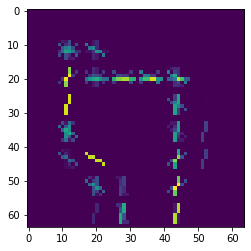

In [11]:
from skimage.feature import hog
import cv2
import numpy as np
import matplotlib.pyplot as plt
image=cv2.imread('/home/zadmin/Documents/training_set/A/A_TRAIN_1.png')
hog_images = []
hog_features = []
fd,hog_image = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
hog_images.append(hog_image)
hog_features.append(fd)
print(np.array(hog_features,'float64'))
plt.imshow(hog_image)
np.array(hog_features).shape

In [1]:
import os
from skimage.feature import hog
from tqdm import tqdm_notebook as tqdm
import cv2
import numpy as np
basePath='/home/zadmin/Desktop/python_project/_data_'
filelist=os.listdir(basePath);
hogA=[]
hogB=[]
labelA=[]
labelB=[]
for folder in tqdm(filelist):
    if(folder=='A'):
        path=os.listdir(basePath+'/'+folder)
        for image in path:
            imagePath=basePath+'/'+folder+'/'+image
            im=cv2.imread(imagePath)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
            im = cv2.Canny(im, 150,200) 
            img=np.array(im)
            fd,hog_image = hog(img, orientations=9, pixels_per_cell=(16,16),cells_per_block=(4,4),block_norm= 'L2',transform_sqrt=True,visualize=True,multichannel=False)
            hogA.append(fd)
            labelA.append(folder)
    else:
        path=os.listdir(basePath+'/'+folder)
        for image in path:
            imagePath=basePath+'/'+folder+'/'+image
            im=cv2.imread(imagePath)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            im = cv2.Canny(im, 150,200) 
            img=np.array(im)
            fd,hog_image = hog(img, orientations=9, pixels_per_cell=(16,16),cells_per_block=(4,4),block_norm= 'L2',transform_sqrt=True,visualize=True,multichannel=False)
            hogB.append(fd)
            labelB.append(folder)

In [4]:
import pandas as pd
dataB=pd.DataFrame(data=hogB)
dataB['label']=np.array(labelB)

In [5]:
sum([True for idx,row in dataB.iterrows() if any(row.isnull())])

0

In [6]:
updatedB=dataB.dropna()
print(updatedB.shape)
updatedB.head()

(2500, 14401)


,0,1,2,3,4,5,6,7,8,9,...,14391,14392,14393,14394,14395,14396,14397,14398,14399,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B


In [7]:
dataA=pd.DataFrame(data=hogA)
dataA['label']=np.array(labelA)

In [8]:
sum([True for idx,row in dataA.iterrows() if any(row.isnull())])


0

In [9]:
updatedA=dataA.dropna()
print(updatedA.shape)
updatedA.head()

(2500, 14401)


,0,1,2,3,4,5,6,7,8,9,...,14391,14392,14393,14394,14395,14396,14397,14398,14399,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A


In [11]:
totalData=pd.concat([updatedA, updatedB],axis=0)

In [12]:
totalData.reset_index(drop=True)
totalData = totalData.sample(frac=1).reset_index(drop=True)
print(totalData.shape)
totalData.head(20)

(5000, 14401)


,0,1,2,3,4,5,6,7,8,9,...,14391,14392,14393,14394,14395,14396,14397,14398,14399,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A


In [13]:
from sklearn import svm
from sklearn.model_selection import train_test_split
#dataDf=pd.DataFrame(data=totalData.iloc[:,0:14400])
data=totalData.iloc[:,0:14400]
labels=totalData['label']
# data =[[updatedA.shape],[updatedB.shape]]
# labels= [0,1]
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.3)
x_train =x_train.to_numpy()
y_train = y_train.to_numpy()
x_test =x_test.to_numpy()
y_test =y_test.to_numpy()
print(x_test.shape)
print(y_train)
clf = svm.SVC(gamma=0.001,C=100,kernel='poly')
clf.fit(x_train,y_train)

(1500, 14400)
['B' 'A' 'A' ... 'A' 'A' 'B']


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
predict=clf.predict(x_test)
from sklearn.metrics import accuracy_score
#print(x_test[11])
pre = clf.predict(x_test[0].reshape(1,14400))
print(pre)
print(accuracy_score(y_test,predict)*100)
#print(predict,y_test)

['A']
90.60000000000001


In [15]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = y_test
predicted = predict
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix:')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted)*100 )
print('Report:')
print(classification_report(actual, predicted) )

Confusion Matrix:
[[612 141]
 [  0 747]]
Accuracy Score : 90.60000000000001
Report:
              precision    recall  f1-score   support

           A       1.00      0.81      0.90       753
           B       0.84      1.00      0.91       747

    accuracy                           0.91      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.92      0.91      0.91      1500



In [23]:
from skimage.io import imread, imshow
from skimage.feature import hog
import pandas as pd
img = imread('A1407.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.Canny(img, 150,200) 
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(16,16),cells_per_block=(4,4),block_norm= 'L2',transform_sqrt=True,visualize=True,multichannel=False)
#dataNew=pd.DataFrame(data=fd)
#dataNew = np.array(dataNew)
dataNew = fd.reshape(1,14400)
#print(fd)
print(clf.predict(dataNew))
#print(dataNew)
#data = print(dataNew.iloc[1:0,:1])
#print(data)

['A']


In [16]:
from sklearn.externals import joblib 
filename = '1200image.pkl'
joblib.dump(clf, filename)

/home/zadmin/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['1200image.pkl']

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()
train_param=[{'C':[10**-4, 10**-2, 10**0, 10**2, 10**4], 'gamma':[10**-4,  10**-2,  10**0, 10**2, 10**4]}]
model=GridSearchCV(svc, train_param, scoring='roc_auc', cv=4, return_train_score=True)
model.fit(x_train, y_train)
print(model.best_estimator_)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [70]:
best_alpha=model.best_params_
print(best_alpha)

{'C': 100, 'gamma': 0.0001}


In [20]:
import cv2
from skimage.feature import hog
from sklearn.externals import joblib 
import httplib2
filename = '1200image.pkl'
clf = joblib.load(filename)
conn = httplib2.Http()

cam = cv2.VideoCapture(0)
img_text =" "
while(True):
    ret,frame = cam.read()
    frame = cv2.flip(frame,1)
    img2 = cv2.rectangle(frame,(50,50),(270,270),(255,255,0),0)
    img2 = img2[52:268,52:268]
    img2 = cv2.imwrite("1.png",img2)
    img = cv2.imread("1.png",1)
    #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img, 150,200) 
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(16,16),cells_per_block=(4,4),block_norm= 'L2',transform_sqrt=True,visualize=True,multichannel=False)
    dataNew = fd.reshape(1,14400)
    output = clf.predict(dataNew)
    img_text=output[0]
    cv2.putText(frame, img_text , (20, 400), cv2.FONT_HERSHEY_TRIPLEX, 1, (0, 0, 255), 3)
    if(img_text == "A"):
        conn.request("https://api.thingspeak.com/update?api_key=J1VMRI7DEEL55HUS&field1=100")
    if(img_text=="B"):
        conn.request("https://api.thingspeak.com/update?api_key=J1VMRI7DEEL55HUS&field1=50")
    cv2.imshow("gray",img)
    cv2.imshow("cam",frame)
    if cv2.waitKey(1) == 27:#press esc to close the all window
        break
        
cam.release()       
cv2.destroyAllWindows()
